# The use of GenAI in the Games Industry
Analyzing and visualizing our survey data


## Setup
First we import needed libraries and our data from a .xlsx file.


In [107]:
# package for data manipulation including ggplot2
library(tidyverse)

# package for reading excel files
library(readxl)

# read the excel file
data <- read_excel("data/surveyData20240414.xlsx")


## What is the data?
Now let's count the rows (number of respondents) and list the collumns (questions).

In [108]:
# count the number of rows and columns
dim(data)

# list the column names
names(data)


[1] 302  74

[1] "ID"                                                                                                       
 [2] "Start time"                                                                                               
 [3] "Completion time"                                                                                          
 [4] "Email"                                                                                                    
 [5] "Name"                                                                                                     
 [6] "Do you consider yourself a professional or hobbyist in Gamee"                                             
 [7] "What is the size of the team?"                                                                            
 [8] "What department(s) do you work in? Check all that applies."                                               
 [9] "Do you utilize Generative AI in your work? Eg. ChatGPT, Midjourney, Copilot etc."                         
[10] "Is it something you have discovered on your own, or has it been provided by your workplace?"              
[11] "Has it made you more efficient in your role?<U+00A0>"                                                     
[12] "Has it made you better? Eg. More creative, being able to do things you couldn't before etc."              
[13] "Do you enjoy using Generative AI in your role? P"                                                         
[14] "Question"                                                                                                 
[15] "Do you enjoy using generative AI in your role?"                                                           
[16] "Would you care to elaborate?"                                                                             
[17] "Does your use of Generative AI impact how proud you are of your work?"                                    
[18] "Would you care to elaborate?2"                                                                            
[19] "Are you and/or your team open about your use of Generative AI?"                                           
[20] "Would you care to elaborate?3"                                                                            
[21] "Question2"                                                                                                
[22] "Do you consider yourself a professional or a hobbyist in game development?"                               
[23] "Primary area of work?"                                                                                    
[24] "Years of experience in game development?"                                                                 
[25] "Are you in a lead role?"                                                                                  
[26] "Team size?"                                                                                               
[27] "Column1"                                                                                                  
[28] "Statement 2"                                                                                              
[29] "Question3"                                                                                                
[30] "Overall stance on Generative AI?"                                                                         
[31] "Column2"                                                                                                  
[32] "Statement 22"                                                                                             
[33] "Which areas do you think are less<U+00A0>"                                                                
[34] "Art & Assets"                                                                                             
[35] "Level Design"                                                                                             
[36] "Storytelling"                           

## Proffesionals vs Hobbyists
Now let's compare the proffesionals and the hobbyists.

### Distribution

Do you consider yourself a professional or a hobbyist in game development?,n,percentage
<chr>,<int>,<dbl>
Hobbyist,199,65.89404
Professional,103,34.10596


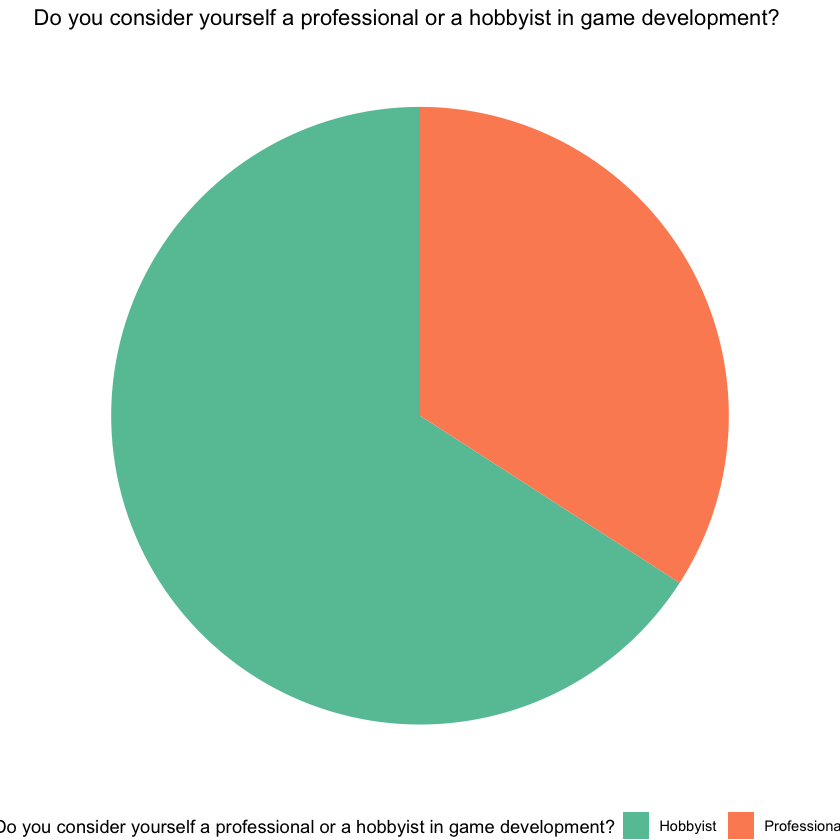

In [109]:
# Show the percentage of Do you consider yourself a professional or a hobbyist in game development?
data %>%
  count(`Do you consider yourself a professional or a hobbyist in game development?`) %>%
  mutate(percentage = n / sum(n) * 100)

# Make a pie chart of the data
data %>%
  count(`Do you consider yourself a professional or a hobbyist in game development?`) %>%
  ggplot(aes(
    x = "", y = n, fill =
      `Do you consider yourself a professional or a hobbyist in game development?`
  )) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.position = "bottom") +
  labs(title = "Do you consider yourself a professional or a hobbyist in game development?") +
  scale_fill_brewer(palette = "Set2")


### Do they use GenAI?

Do you use Generative AI in your work?,n,percentage
<chr>,<int>,<dbl>
No,184,60.92715
Yes,118,39.07285


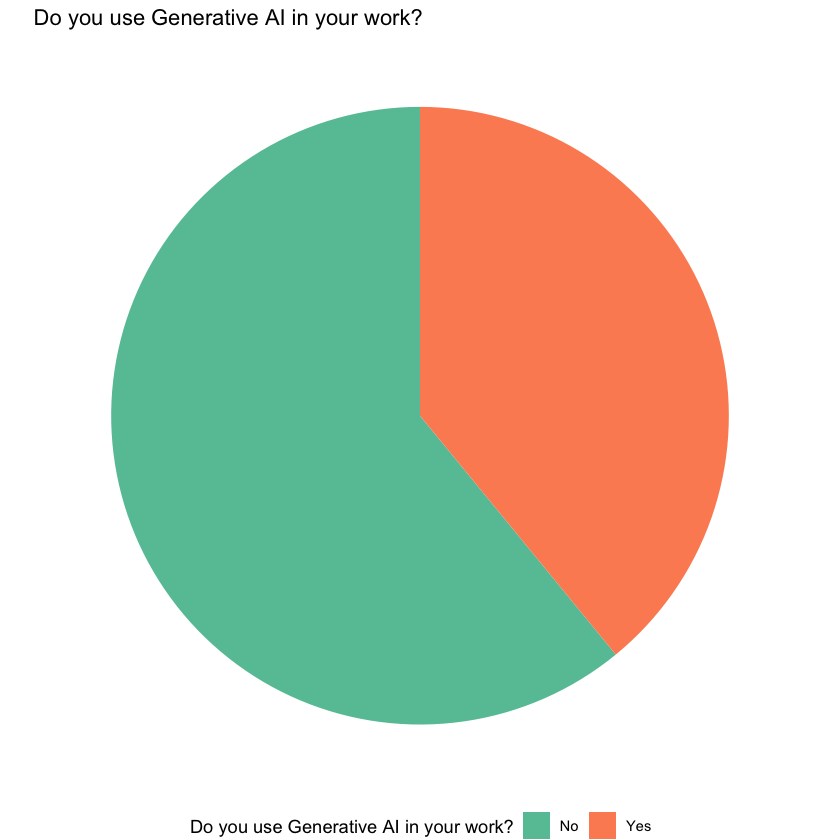

In [110]:
# Show the percentage of Do you use Generative AI in ypur work?
data %>%
  count(`Do you use Generative AI in your work?`) %>%
  mutate(percentage = n / sum(n) * 100)

# Make a pie chart of the data
data %>%
  count(`Do you use Generative AI in your work?`) %>%
  ggplot(aes(x = "", y = n, fill = `Do you use Generative AI in your work?`)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.position = "bottom") +
  labs(title = "Do you use Generative AI in your work?") +
  scale_fill_brewer(palette = "Set2")


Do you consider yourself a professional or a hobbyist in game development?,Do you use Generative AI in your work?,n,percentage
<chr>,<chr>,<int>,<dbl>
Hobbyist,No,126,63.31658
Hobbyist,Yes,73,36.68342
Professional,No,58,56.31068
Professional,Yes,45,43.68932


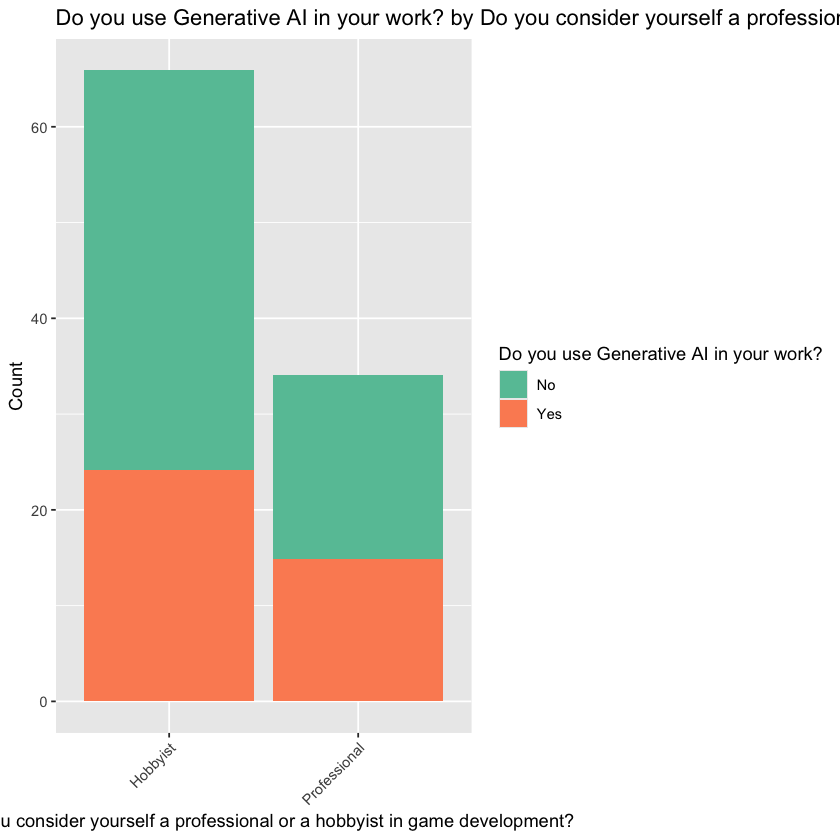

In [111]:
# Show the percentage of Do you use Generative AI in your work? by
# Do you consider yourself a professional or a hobbyist in game development?
data %>%
  count(
    `Do you consider yourself a professional or a hobbyist in game development?`,
    `Do you use Generative AI in your work?`
  ) %>%
  group_by(`Do you consider yourself a professional or a hobbyist in game development?`) %>%
  mutate(percentage = n / sum(n) * 100)

# Make a stacked bar chart  with percentage as y axis of Do you use Generative AI in your work? by
# Do you consider yourself a professional or a hobbyist in game development?
data %>%
  count(
    `Do you consider yourself a professional or a hobbyist in game development?`,
    `Do you use Generative AI in your work?`
  ) %>%
  ggplot(aes(
    x = `Do you consider yourself a professional or a hobbyist in game development?`,
    y = n,
    fill = `Do you use Generative AI in your work?`
  )) +
  geom_bar(stat = "identity") +
  labs(
    title = "Do you use Generative AI in your work? by Do you consider yourself a professional or a hobbyist in game development?",
    x = "Do you consider yourself a professional or a hobbyist in game development?",
    y = "Count"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")

### Overall stance on GenAI

Column2,n,percentage
<fct>,<int>,<dbl>
Very negative,81,26.82119
Negative,59,19.53642
Neutral,61,20.19868
Positive,62,20.52980
Very positive,39,12.91391


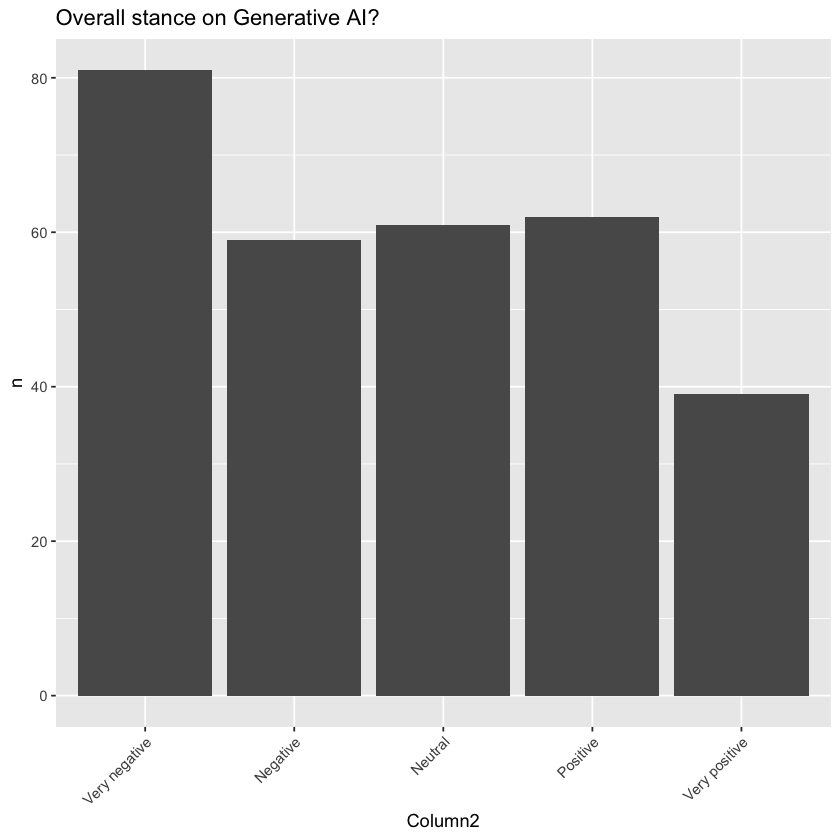

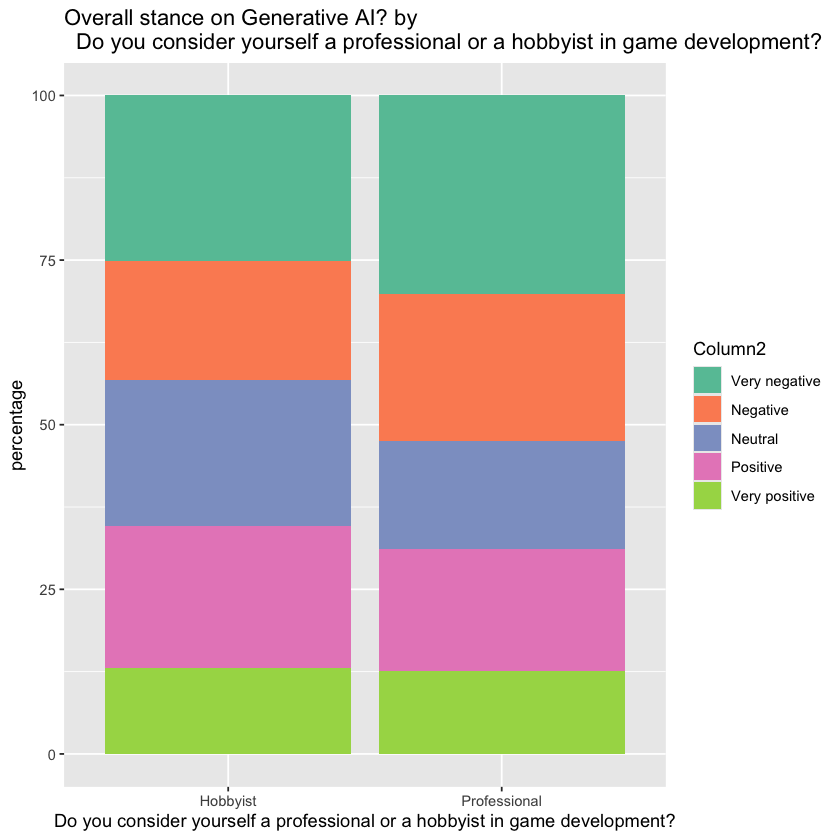

In [112]:
# Show the data from the likert scale question Overall stance on Generative AI?
# And order it from left to right "Very negative", "Negative", "Neutral", "Positive", "Very positive"
data %>%
  count(`Column2`) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  mutate(`Column2` = factor(
    `Column2`,
    levels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )) %>%
  arrange(`Column2`)

# Make a chart of the data
data %>%
  count(`Column2`) %>%
  mutate(`Column2` = factor(
    `Column2`,
    levels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )) %>%
  ggplot(aes(x = `Column2`, y = n)) +
  geom_bar(stat = "identity") +
  labs(title = "Overall stance on Generative AI?") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_discrete(
    breaks = c("Very negative", "Negative", "Neutral", "Positive", "Very positive"),
    labels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )

# Take the above data and make a stacked bar chart by
# Do you consider yourself a professional or a hobbyist in game development?
# And show the y-axis as a percentage and order it from "Very negative", "Negative", "Neutral", "Positive", "Very positive"
data %>%
  count(
    `Do you consider yourself a professional or a hobbyist in game development?`,
    `Column2`
  ) %>%
  group_by(`Do you consider yourself a professional or a hobbyist in game development?`) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  mutate(`Column2` = factor(
    `Column2`,
    levels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )) %>%
  ggplot(aes(
    x = `Do you consider yourself a professional or a hobbyist in game development?`,
    y = percentage, fill = `Column2`
  )) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Overall stance on Generative AI? by
  Do you consider yourself a professional or a hobbyist in game development?") +
  scale_fill_brewer(palette = "Set2")

## Years of professional experience

### Does experience change attitudes towards GenAI?

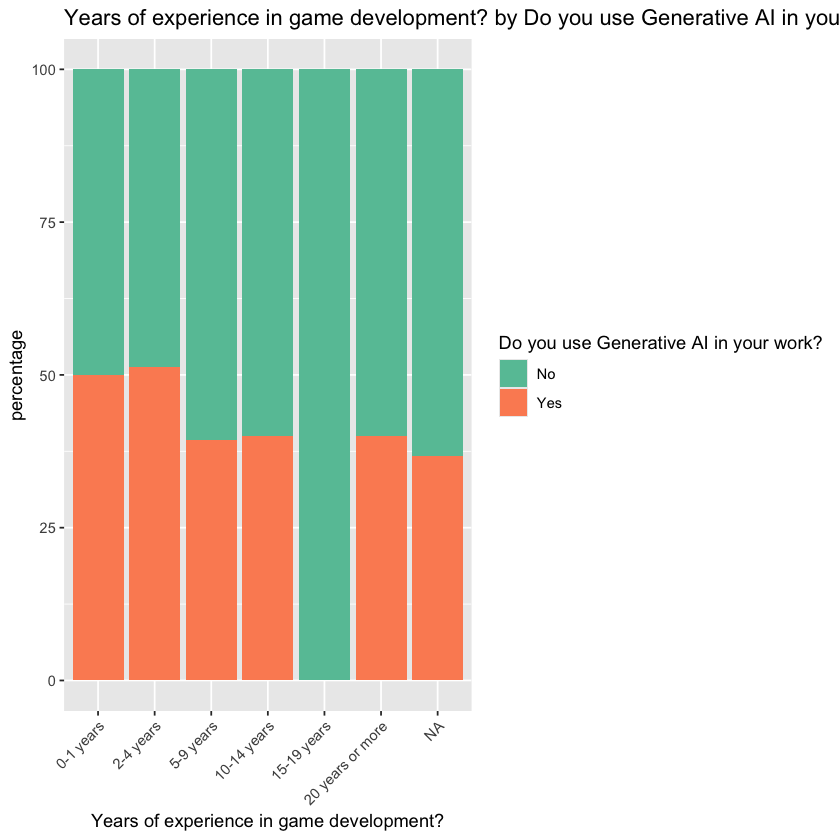

In [113]:
# Make a stacked barchart showing Years of experience in game development? by Do you use Generative AI in your work? in percentages
# And order the x-axis from left to right "0-1 years, 2-4 years, 5-9 years, 10-14 years, 15-19 years, 20 years or more"
data %>%
  count(
    `Years of experience in game development?`,
    `Do you use Generative AI in your work?`
  ) %>%
  group_by(`Years of experience in game development?`) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  mutate(`Years of experience in game development?` = factor(
    `Years of experience in game development?`,
    levels = c(
      "0-1 years",
      "2-4 years",
      "5-9 years",
      "10-14 years",
      "15-19 years",
      "20 years or more"
    )
  )) %>%
  ggplot(aes(
    x = `Years of experience in game development?`,
    y = percentage, fill = `Do you use Generative AI in your work?`
  )) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Years of experience in game development? by Do you use Generative AI in your work?") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")

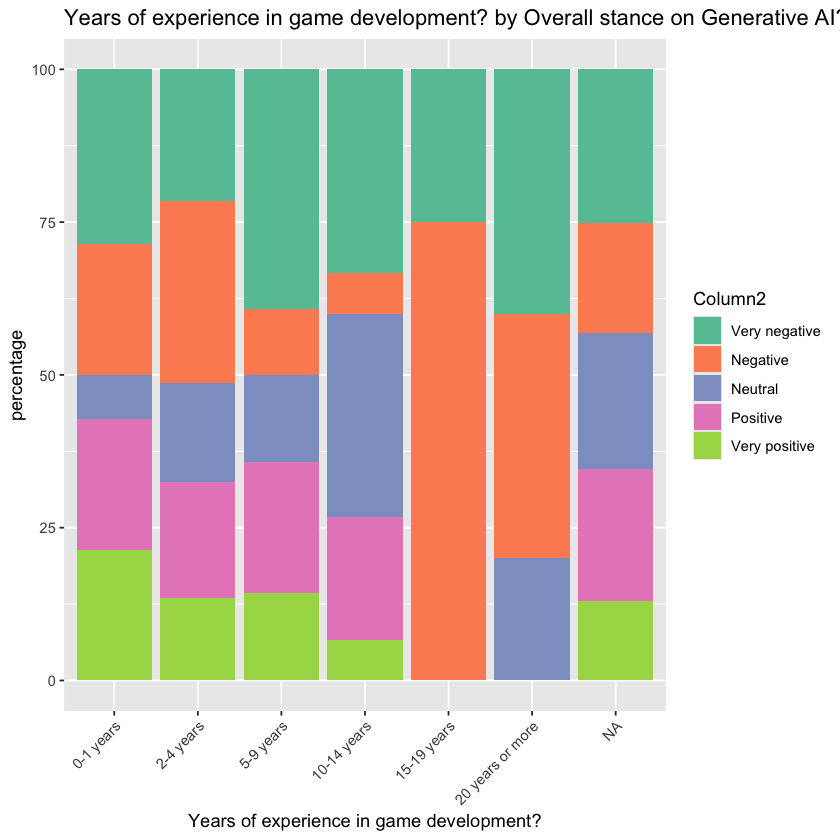

In [114]:
# Make a stacked barchart showing Years of experience in game development? by Column2 in percentages
# And order the x-axis from left to right "0-1 years, 2-4 years, 5-9 years, 10-14 years, 15-19 years, 20 years or more"
data %>%
  count(
    `Years of experience in game development?`,
    `Column2`
  ) %>%
  group_by(`Years of experience in game development?`) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  mutate(`Years of experience in game development?` = factor(
    `Years of experience in game development?`,
    levels = c(
      "0-1 years",
      "2-4 years",
      "5-9 years",
      "10-14 years",
      "15-19 years",
      "20 years or more"
    )
  )) %>%
  mutate(`Column2` = factor(
    `Column2`,
    levels = c("Very negative", "Negative", "Neutral", "Positive", "Very positive")
  )) %>%
  ggplot(aes(
    x = `Years of experience in game development?`,
    y = percentage, fill = `Column2`
  )) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Years of experience in game development? by Overall stance on Generative AI?") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")

## Stance on GenAI

### Benefits of GenAI

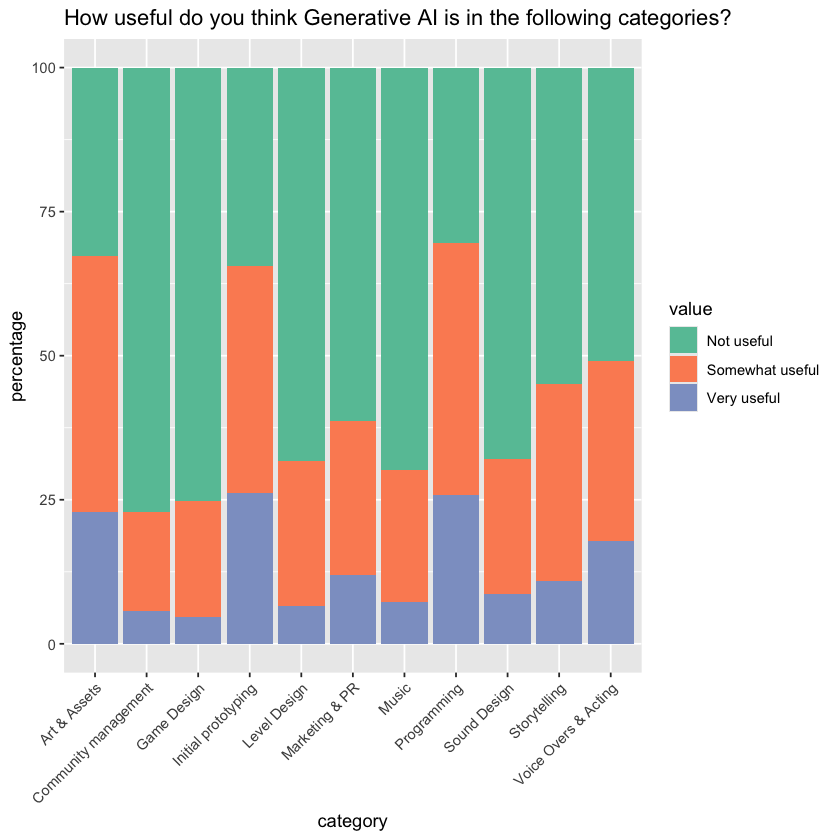

In [115]:

# A horizontal stacked bar chart showing the usefulnes of GenAI in different categories in percentages
data %>%
  count(
    `Art & Assets`,
    `Level Design`,
    `Storytelling`,
    `Sound Design`,
    `Voice Overs & Acting`,
    `Programming`,
    `Game Design`,
    `Marketing & PR`,
    `Music`,
    `Community management`,
    `Initial prototyping`
  ) %>%
  gather(key = "category", value = "value", -n) %>%
  group_by(category) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(
    x = category,
    y = percentage,
    fill = value
  )) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "How useful do you think Generative AI is in the following categories?") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")

In [116]:
# show a top ten of the longest answer time by looking at "Start time" and "Completion time" and show the 
data %>%
  mutate(
    `Start time` = as.POSIXct(`Start time`, format = "%Y-%m-%d %H:%M:%S"),
    `Completion time` = as.POSIXct(`Completion time`, format = "%Y-%m-%d %H:%M:%S")
  ) %>%
  mutate(answer_time = `Completion time` - `Start time`) %>%
  arrange(desc(answer_time)) %>%
  select(`Start time`, `Completion time`, answer_time) %>%
  head(10)



Start time,Completion time,answer_time
<dttm>,<dttm>,<drtn>
2024-04-13 02:32:51,2024-04-13 04:32:37,119.76667 mins
2024-03-27 11:47:26,2024-03-27 13:39:03,111.61667 mins
2024-03-27 11:34:55,2024-03-27 13:17:30,102.58333 mins
2024-03-27 12:56:46,2024-03-27 14:24:55,88.15000 mins
2024-03-27 19:57:00,2024-03-27 21:19:30,82.50000 mins
2024-03-28 00:07:37,2024-03-28 01:27:05,79.46667 mins
2024-03-27 19:09:30,2024-03-27 20:21:17,71.78333 mins
2024-03-27 16:04:30,2024-03-27 17:08:01,63.51667 mins
2024-04-03 10:49:05,2024-04-03 11:39:41,50.60000 mins
